In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hmeq=pd.read_csv(r"C:\Users\chemm\Desktop\cours\MOSEF\Python\Exercice\Scoring\Projet_scoring\data\hmeq.csv")
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


Imputation des données

In [3]:
MissingData = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData['Percentage Missing'] = (MissingData['Missing Values'] / len(hmeq)) * 100
MissingData = MissingData.sort_values(by='Percentage Missing', ascending=False)
MissingData

,Variables,Missing Values,Percentage Missing
12,DEBTINC,1267,21.258389
7,DEROG,708,11.879195
8,DELINQ,580,9.731544
2,MORTDUE,518,8.691275
6,YOJ,515,8.640940
10,NINQ,510,8.557047
9,CLAGE,308,5.167785
5,JOB,279,4.681208
4,REASON,252,4.228188
11,CLNO,222,3.724832


Imputation par median

In [4]:
hmeq_filled = hmeq.copy()
variables_numeriques = ['DEBTINC', 'MORTDUE', 'YOJ', 'NINQ', 'CLAGE', 'CLNO', 'VALUE', 'DEROG', 'DELINQ']
for var in variables_numeriques:
    hmeq_filled[var] = hmeq_filled[var].fillna(hmeq_filled[var].median())

variables_categorielles = ['JOB', 'REASON']
for var in variables_categorielles:
    hmeq_filled[var] = hmeq_filled[var].fillna(hmeq_filled[var].mode()[0])
    
print(hmeq_filled.isnull().sum())


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


In [5]:
print(hmeq_filled.describe())

               BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5960.000000    5960.000000  5960.000000   
mean      0.199497  18607.969799   73001.041812  101540.387423     8.756166   
std       0.399656  11207.480417   42552.726779   56869.436682     7.259424   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   48139.000000   66489.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   88200.250000  119004.750000    12.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5960.000000  5960.000000  5960.000000  5960.000000  5960.000000   
mean      0.224329     0.405705   179.440725     1.170134    21.247819   
std       0.798458     1.079256    83.574697     1.653866     9.95

In [6]:
print(hmeq_filled.isnull().sum())

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


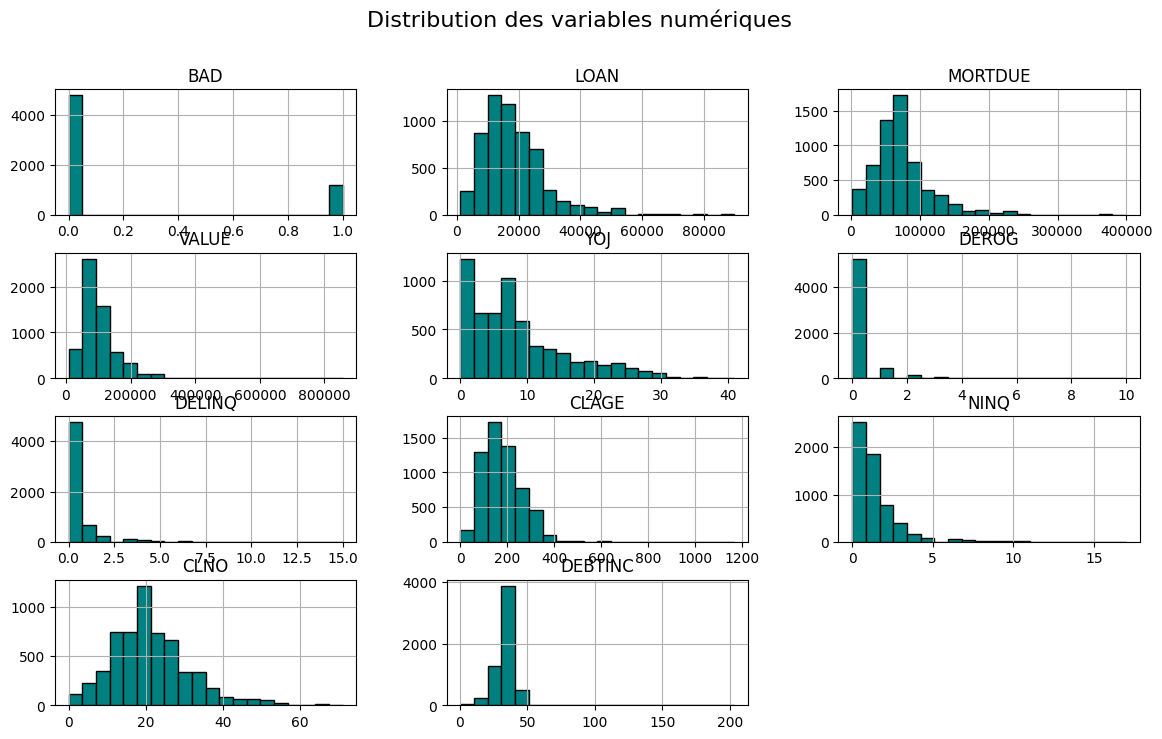

In [7]:
variables_numeriques = ['DEBTINC', 'MORTDUE', 'YOJ', 'NINQ', 'CLAGE', 'CLNO', 'VALUE', 'DEROG', 'DELINQ']

hmeq_filled.hist(bins=20, figsize=(14, 8), color='teal', edgecolor='black')
plt.suptitle('Distribution des variables numériques', size=16)
plt.show()


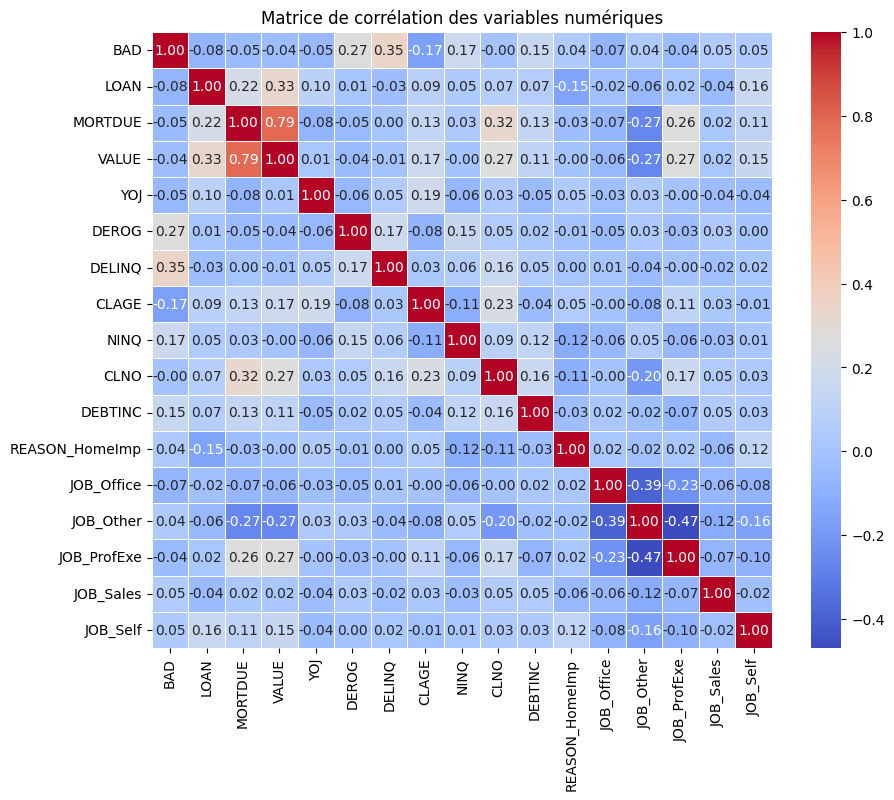

In [8]:
hmeq_filled_encoded = pd.get_dummies(hmeq_filled, drop_first=True)

plt.figure(figsize=(10, 8))
corr_matrix = hmeq_filled_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation des variables numériques')
plt.show()


Modelisation

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [10]:
from sklearn.model_selection import train_test_split

X = hmeq_filled_encoded.drop(columns=['BAD']) 
y = hmeq_filled_encoded['BAD']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")


Taille de l'ensemble d'entraînement: (4172, 16)
Taille de l'ensemble de test: (1788, 16)


In [11]:
for name, model in models.items():
    print(f"Modèle: {name}")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
    print("Rapport de classification:\n", classification_report(y_test, y_pred))
    print("-" * 60)


Modèle: Logistic Regression


c:\Users\chemm\Desktop\cours\MOSEF\Python\Exercice\Scoring\Projet_scoring\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8159955257270693
Matrice de confusion:
 [[1351   38]
 [ 291  108]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1389
           1       0.74      0.27      0.40       399

    accuracy                           0.82      1788
   macro avg       0.78      0.62      0.64      1788
weighted avg       0.80      0.82      0.78      1788

------------------------------------------------------------
Modèle: Random Forest
Accuracy: 0.9060402684563759
Matrice de confusion:
 [[1358   31]
 [ 137  262]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1389
           1       0.89      0.66      0.76       399

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.90      1788

-------------------------------------------------

In [12]:
# from sklearn.impute import KNNImputer
# import pandas as pd

# hmeq_knn_imputed = hmeq.copy()
# hmeq_encoded = pd.get_dummies(hmeq_knn_imputed, drop_first=True)
# variables_all = hmeq_encoded.columns.tolist()
# imputer_knn = KNNImputer(n_neighbors=5)
# hmeq_encoded_imputed = pd.DataFrame(imputer_knn.fit_transform(hmeq_encoded), columns=hmeq_encoded.columns)

# print(hmeq_encoded_imputed.isnull().sum())


Imputation par Reg lineaire et mediane

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd

hmeq_filled_reg_lin_med = hmeq.copy()
hmeq_filled_reg_lin_med = pd.get_dummies(hmeq_filled_reg_lin_med, drop_first=True)
variables_all = hmeq_filled_reg_lin_med.columns.tolist()
for target_var in variables_all:
    train_data = hmeq_filled_reg_lin_med.dropna(subset=[target_var])  
    missing_data = hmeq_filled_reg_lin_med[hmeq_filled_reg_lin_med[target_var].isnull()]  
    

    other_vars = [var for var in variables_all if var != target_var]  
    imputer = SimpleImputer(strategy='median')
    
    X_train = train_data[other_vars]
    X_train_imputed = imputer.fit_transform(X_train)
    
    y_train = train_data[target_var]  
    
    X_missing = missing_data[other_vars]
    X_missing_imputed = imputer.transform(X_missing)
    
    model = LinearRegression()
    model.fit(X_train_imputed, y_train)
    
    hmeq_filled_reg_lin_med.loc[hmeq_filled_reg_lin_med[target_var].isnull(), target_var] = model.predict(X_missing_imputed)


print(hmeq_filled_reg_lin_med.isnull().sum())


ValueError: Found array with 0 sample(s) (shape=(0, 16)) while a minimum of 1 is required by SimpleImputer.

In [41]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = hmeq_encoded_imputed.copy()

# df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,72886.024190,101269.480818,8.901005,0.277617,0.528423,179.119689,1.177517,21.215403,33.138507,0.298658,0.159060,0.400671,0.214094,0.018289,0.032383
std,0.399656,11207.480417,43157.004661,57255.046322,7.375631,0.813064,1.140982,84.158089,1.669595,10.004637,8.107565,0.457708,0.365763,0.490076,0.410227,0.134004,0.177029
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11100.000000,46446.750000,65673.250000,3.000000,0.000000,0.000000,116.722309,0.000000,15.000000,28.298607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,16300.000000,64376.500000,88614.500000,7.000000,0.000000,0.000000,172.561194,1.000000,20.000000,33.881570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,23300.000000,89954.750000,119202.250000,13.000000,0.000000,1.000000,228.041251,2.000000,26.000000,38.264188,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# # 8. Vérification des valeurs manquantes après le preprocessing
# print("\nValeurs manquantes après preprocessing :\n", df.isnull().sum())


Valeurs manquantes après preprocessing :
 BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_HomeImp    0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64


In [47]:
# plt.figure(figsize=(6, 4))
# sns.countplot(x='BAD', data=df, palette="Set2", hue='BAD', dodge=False)
# plt.title('Distribution de la variable cible BAD')
# plt.show()


<Figure size 1400x800 with 0 Axes>

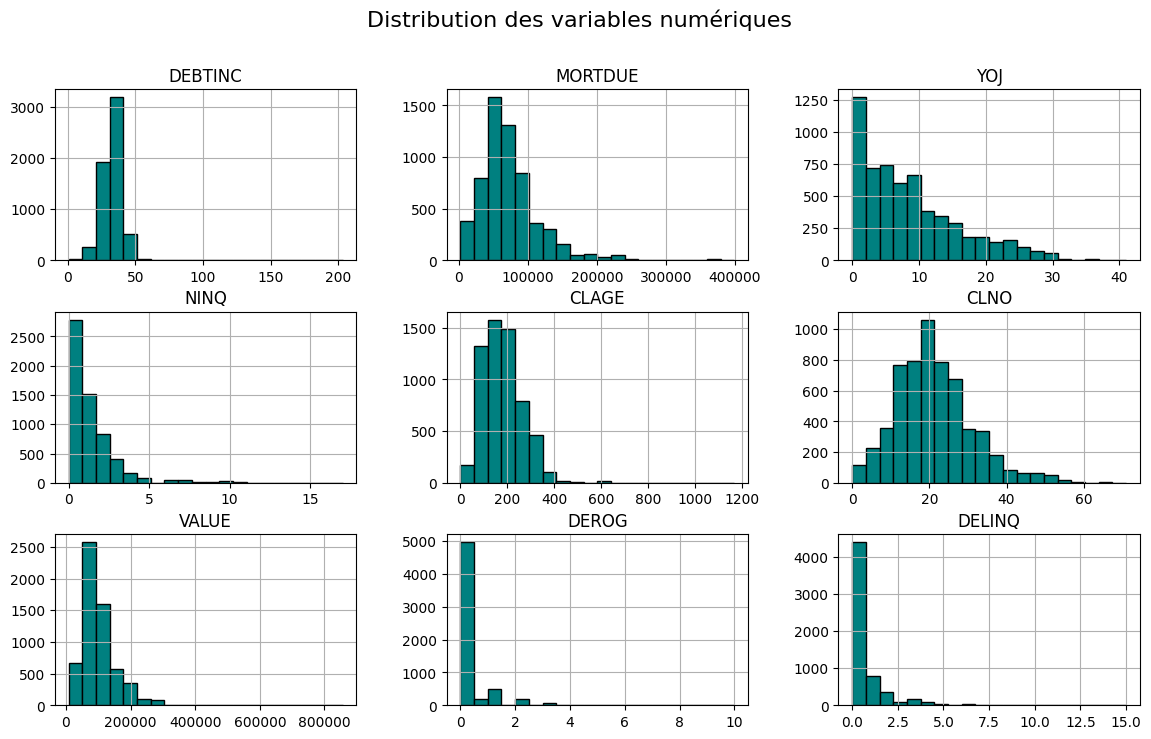

In [44]:

# # 3. Analyse des distributions des variables numériques
# variables_numeriques = ['DEBTINC', 'MORTDUE', 'YOJ', 'NINQ', 'CLAGE', 'CLNO', 'VALUE', 'DEROG', 'DELINQ']

# plt.figure(figsize=(14, 8))
# df[variables_numeriques].hist(bins=20, figsize=(14, 8), color='teal', edgecolor='black')
# plt.suptitle('Distribution des variables numériques', size=16)
# plt.show()


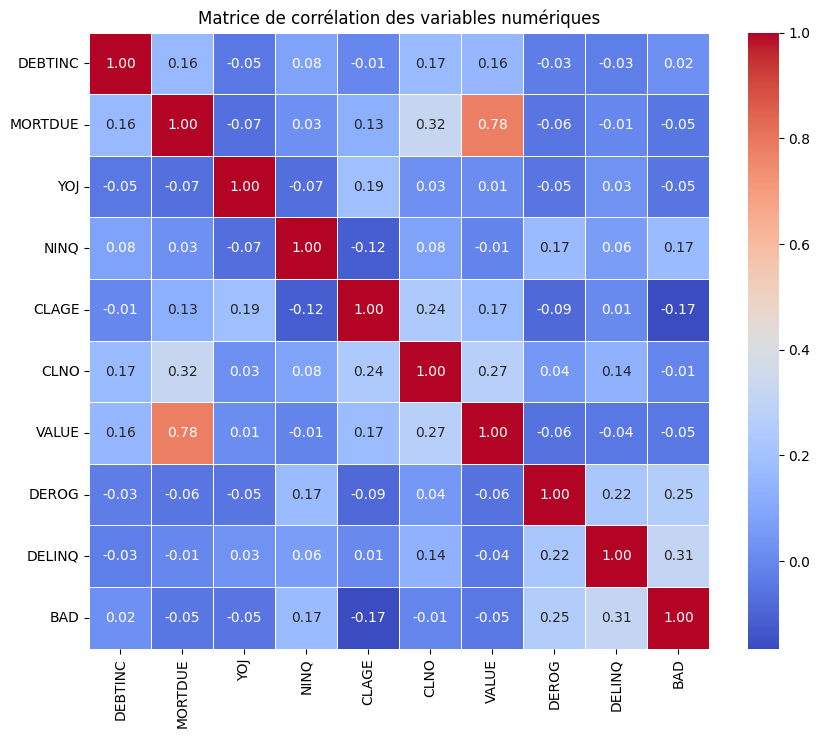

In [45]:
# # 4. Matrice de corrélation
# plt.figure(figsize=(10, 8))
# correlation_matrix = df[variables_numeriques + ['BAD']].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Matrice de corrélation des variables numériques')
# plt.show()


In [ ]:

# # 5. Relation entre les variables explicatives et la variable cible 'BAD' (Boxplots)
# for var in variables_numeriques:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x='BAD', y=var, data=df, palette="Set2")
#     plt.title(f'Boxplot de {var} selon BAD')
#     plt.show()


In [ ]:

# # 6. Relation entre les variables explicatives et la variable cible 'BAD' (Distributions)
# for var in variables_numeriques:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data=df, x=var, hue='BAD', kde=True, multiple='stack', palette="Set2")
#     plt.title(f'Distribution de {var} selon BAD')
#     plt.show()


In [ ]:

# # 7. Analyse des variables catégorielles encodées
# variables_categorielles_encoded = [col for col in df.columns if 'JOB_' in col or 'REASON_' in col]

# for var in variables_categorielles_encoded:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(x=var, hue='BAD', data=df, palette="Set2")
#     plt.title(f'Distribution de {var} selon BAD')
#     plt.show()

